# INCOME CLASSIFICATION

# Attribute Information:
Variable	Definition 	Key
Age	Age	
Workplace	Workplace 	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
fnlwgt	fnlwgt	
education	education	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
education-num	equivalent numeric representation for education	10th Standard- 6, 11th Standard - 7, 12th Standard - 8, 1st-4th standard- 2,  5th-6th standard - 3,  7th-8th standard- 4, 9th Standard - 5, Assoc-acdm-12, Assoc-voc-11,Bachelors -13, Doctorate - 16,  HS-grad -9, some-college-10,Prof-scgool-15, Masters -14, Preschool-1,
marital-status		 Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
relationship		 Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
race		 White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex		Female, Male
hours-per-week	number of hours worked in a week	
native-country	country to which the person belongs	
income	if income is above 50K or below 50K	income>50K - 1, income<= 50K - 0


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import scatter_matrix


In [2]:
#read the csv file in a variable named income_data
income_data = pd.read_csv('G:\Python\income_evaluation.csv')

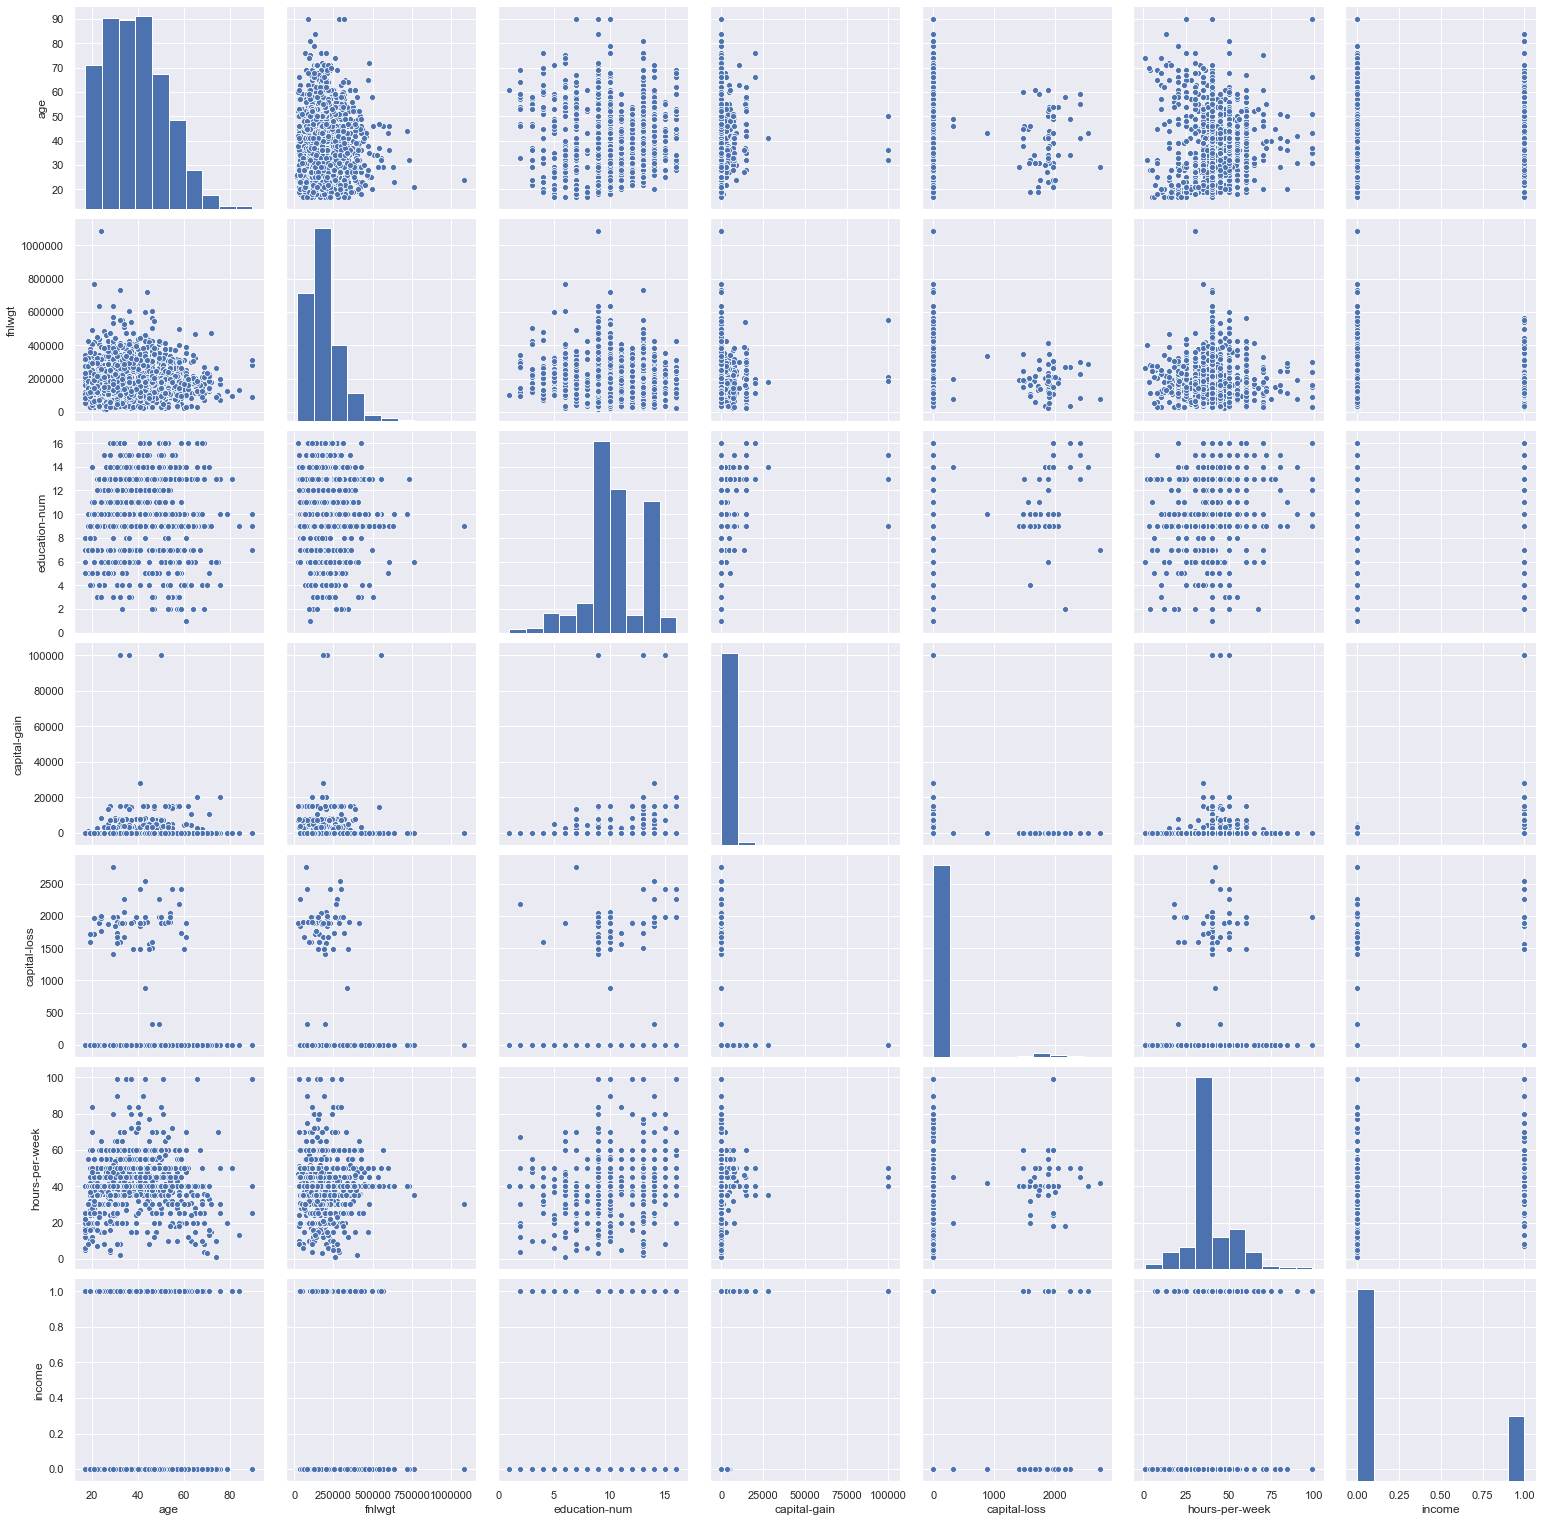

In [3]:
sns.set()
ser= income_data.columns
sns.pairplot(income_data[ser],height =3)
plt.show()

# Data Preprocessing 

In [4]:
#get a concise summary of the dataframe column
income_data.info()
income_data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 15 columns):
age               1501 non-null float64
workclass         1495 non-null object
fnlwgt            1499 non-null float64
education         1491 non-null object
education-num     1483 non-null float64
marital-status    1493 non-null object
occupation        1492 non-null object
relationship      1494 non-null object
race              1492 non-null object
sex               1498 non-null object
capital-gain      1490 non-null float64
capital-loss      1498 non-null float64
hours-per-week    1491 non-null float64
native-country    1491 non-null object
income            1508 non-null int64
dtypes: float64(6), int64(1), object(8)
memory usage: 129.7+ KB


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
#get a sum of the null values in the dataframe column
income_data.isnull().sum()

age                7
workclass         13
fnlwgt             9
education         17
education-num     25
marital-status    15
occupation        16
relationship      14
race              16
sex               10
capital-gain      18
capital-loss      10
hours-per-week    17
native-country    17
income             0
dtype: int64

In [6]:
#computes a summary of statistics pertaining to the DataFrame numeric columns
income_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,1501.000000,1.499000e+03,1483.00000,1490.000000,1498.000000,1491.00000,1508.000000
mean,39.072618,1.908296e+05,10.08766,812.157718,80.324433,40.90275,0.253316
std,13.277929,1.065347e+05,2.57893,5114.319920,383.091092,11.52473,0.435054
min,17.000000,1.882700e+04,1.00000,0.000000,0.000000,1.00000,0.000000
25%,29.000000,1.169095e+05,9.00000,0.000000,0.000000,40.00000,0.000000
50%,38.000000,1.785300e+05,10.00000,0.000000,0.000000,40.00000,0.000000
75%,48.000000,2.392015e+05,13.00000,0.000000,0.000000,45.00000,1.000000
max,90.000000,1.085515e+06,16.00000,99999.000000,2754.000000,99.00000,1.000000


In [7]:
#computes a summary of statistics pertaining to the DataFrame object columns
income_data.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,1495,1491,1493,1492,1494,1492,1498,1491
unique,6,16,7,13,6,5,2,31
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,1087,498,711,205,628,1256,1016,1342


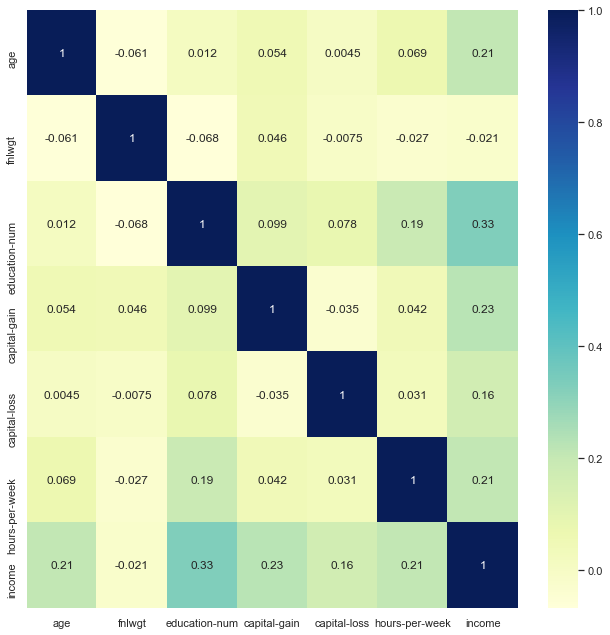

In [8]:
plt.figure(figsize=(11,11)) 
sns.heatmap(income_data.corr(), annot=True, cmap="YlGnBu")

# Feature Scaling
We are verifying the ditribution of data, whether the data is normally distributed or not.

Encoding the categorical data 

In [9]:
#creates a new dataframe which consists of zeros and ones for categorical columns in the data frame
income_data=pd.concat((income_data,pd.get_dummies(income_data['workclass'])),axis=1)
income_data=pd.concat((income_data,pd.get_dummies(income_data['marital-status'])),axis=1)
income_data=pd.concat((income_data,pd.get_dummies(income_data['occupation'])),axis=1)
income_data=pd.concat((income_data,pd.get_dummies(income_data['relationship'])),axis=1)
income_data=pd.concat((income_data,pd.get_dummies(income_data['race'])),axis=1)
income_data=pd.concat((income_data,pd.get_dummies(income_data['sex'])),axis=1)

In [10]:
#removes the duplicate columns from the data frame
income_data = income_data.loc[:,~income_data.columns.duplicated()]
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 54 columns):
age                       1501 non-null float64
workclass                 1495 non-null object
fnlwgt                    1499 non-null float64
education                 1491 non-null object
education-num             1483 non-null float64
marital-status            1493 non-null object
occupation                1492 non-null object
relationship              1494 non-null object
race                      1492 non-null object
sex                       1498 non-null object
capital-gain              1490 non-null float64
capital-loss              1498 non-null float64
hours-per-week            1491 non-null float64
native-country            1491 non-null object
income                    1508 non-null int64
 Federal-gov              1508 non-null uint8
 Local-gov                1508 non-null uint8
 Private                  1508 non-null uint8
 Self-emp-inc             1508 non-null uint8

In [11]:
#drop the categorical and unwanted columns 
income_data=income_data.drop(['fnlwgt','capital-gain','capital-loss','workclass','marital-status','occupation','relationship',
                  'race','sex','education','native-country'],axis=1)

In [12]:
income_data.isnull().sum()

age                        7
education-num             25
hours-per-week            17
income                     0
 Federal-gov               0
 Local-gov                 0
 Private                   0
 Self-emp-inc              0
 Self-emp-not-inc          0
 State-gov                 0
 Divorced                  0
 Married-AF-spouse         0
 Married-civ-spouse        0
 Married-spouse-absent     0
 Never-married             0
 Separated                 0
 Widowed                   0
 Adm-clerical              0
 Craft-repair              0
 Exec-managerial           0
 Farming-fishing           0
 Handlers-cleaners         0
 Machine-op-inspct         0
 Other-service             0
 Priv-house-serv           0
 Prof-specialty            0
 Protective-serv           0
 Sales                     0
 Tech-support              0
 Transport-moving          0
 Husband                   0
 Not-in-family             0
 Other-relative            0
 Own-child                 0
 Unmarried    

In [13]:
#data imputation of the missing values by the column median, mean and mode 
income_data['age'].fillna(income_data['age'].median(),inplace=True)
income_data['hours-per-week'].fillna(income_data['hours-per-week'].mean(),inplace=True)
income_data['education-num'].fillna(income_data['education-num'].mode()[0],inplace=True,axis = 0)

In [14]:
#get a concise summary of the dataframe column
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 43 columns):
age                       1508 non-null float64
education-num             1508 non-null float64
hours-per-week            1508 non-null float64
income                    1508 non-null int64
 Federal-gov              1508 non-null uint8
 Local-gov                1508 non-null uint8
 Private                  1508 non-null uint8
 Self-emp-inc             1508 non-null uint8
 Self-emp-not-inc         1508 non-null uint8
 State-gov                1508 non-null uint8
 Divorced                 1508 non-null uint8
 Married-AF-spouse        1508 non-null uint8
 Married-civ-spouse       1508 non-null uint8
 Married-spouse-absent    1508 non-null uint8
 Never-married            1508 non-null uint8
 Separated                1508 non-null uint8
 Widowed                  1508 non-null uint8
 Adm-clerical             1508 non-null uint8
 Craft-repair             1508 non-null uint8
 Exec-manager

In [15]:
#forming income as the target variable
target = income_data['income']
target_df = pd.DataFrame(target)
target_df

,income
0,1
1,0
2,0
3,0
4,0
...,...
1503,0
1504,1
1505,0
1506,1


In [16]:
#variables other than income are 
features_df=income_data.drop(['income'],axis=1)
features_df

,age,education-num,hours-per-week,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Divorced,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,39.0,14.0,24.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,43.0,9.0,44.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,32.0,13.0,40.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,28.0,10.0,40.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,39.0,13.0,40.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,25.0,13.0,15.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1504,84.0,9.0,13.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1505,37.0,9.0,72.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1506,52.0,16.0,40.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


From the scatter distribution depicted in the beginning we see that the data is not normally ditributed.
As we can see that the data is not normal we choose MinMax Scaler as StandardScaler performs better with Normally distibuted data. 


In [17]:
#preprocessing steps: spliting the dataset
#scaling train and test datasets
X_train_org, X_test_org, y_train, y_test = train_test_split(features_df,target_df,random_state=0)

mn = MinMaxScaler()
X_train = mn.fit_transform(X_train_org)
X_test = mn.transform(X_test_org)

X_train = pd.DataFrame(X_train, columns = X_train_org.columns) 
X_test = pd.DataFrame(X_test, columns = X_test_org.columns) 

In [18]:
X_train = pd.DataFrame(X_train, columns = X_train_org.columns)
print('Train dataset dimensionality:' , X_train.shape)
print('Train dataset dimensionality:' , y_train.shape)

Train dataset dimensionality: (1131, 42)
Train dataset dimensionality: (1131, 1)


In [19]:
X_test = pd.DataFrame(X_test, columns = X_test_org.columns)
print('Test dataset dimensionality:' , X_test.shape)
print('Train dataset dimensionality:' , y_test.shape)

Test dataset dimensionality: (377, 42)
Train dataset dimensionality: (377, 1)


# Data Modeling

# [1] K-Nearest Neighbors Classifier

### Grid Search Using Cross Validation

In [20]:
from pprint import pprint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [21]:
knn = KNeighborsClassifier()
pprint(knn.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [22]:
param_grid_knn = {
            'n_neighbors':range(1,20),
            'weights': ['distance','uniform'],
            'metric': ['euclidean','manhattan']
            }
CV_knn_class = GridSearchCV(KNeighborsClassifier(),
                            param_grid_knn ,
                             verbose = 1
                            ,cv=5, 
                            n_jobs = -1,return_train_score=True)
gs_results =CV_knn_class.fit(X_train, y_train)

Fitting 5 folds for each of 76 candidates, totalling 380 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 380 out of 380 | elapsed:   13.6s finished


In [23]:
CV_knn_class.score(X_test,y_test)

0.8328912466843501

In [24]:
print("Best score for KNN grid serach: ")
gs_results.best_score_

Best score for KNN grid serach: 


0.809902148064403

In [25]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [26]:
print("Best parameters  for KNN grid serach: ")
gs_results.best_params_

Best parameters  for KNN grid serach: 


{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

### Cross validation for KNN Classifier with folds

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
scores1 = cross_val_score(knn, X_train,y_train,cv=5,n_jobs=-1)
print("Cross-validation scores: {}".format(scores1))
print("Average cross-validation score: {:.2f}".format(scores1.mean()))

Cross-validation scores: [0.7753304  0.79646018 0.78318584 0.78761062 0.79646018]
Average cross-validation score: 0.79


In [29]:
k_range = range(1, 20)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.747136563876652, 0.7860434291060777, 0.7754434524969787, 0.7948812911777319, 0.7878094421270126, 0.8001949241744961, 0.7957545514794745, 0.7957584499629644, 0.801056489025769, 0.8063662235390433, 0.809902148064403, 0.8028380959806635, 0.8019492417449612, 0.8037230517328758, 0.8028380959806636, 0.8054773693033411, 0.8081283380764883, 0.8081361350434682, 0.8054812677868309]


Text(0, 0.5, 'Cross-Validated Accuracy')

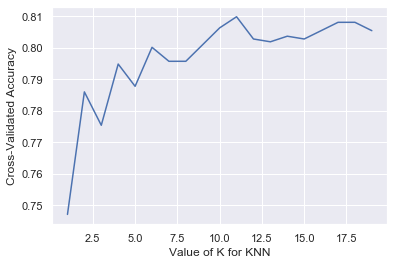

In [30]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#From this graph we observe that at K Neighbor 11 we obtain the highest accuracy so we chose this K Nearest Neighbor Value

### Using best parameters from Grid Search for KNN Classifier

In [31]:
knn=KNeighborsClassifier(n_neighbors=11,weights='uniform',algorithm='auto',p=1)

knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

print('Train score: {:.4f} %'.format(knn.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(knn.score(X_test, y_test)*100))

Train score: 82.0513 %
Test score: 82.4934 %


In [32]:
# convert to DataFrame
param_df = pd.DataFrame(CV_knn_class.cv_results_)
result= param_df[["params","mean_train_score","mean_test_score"]]
# show the first 5 rows
display(result.head())


,params,mean_train_score,mean_test_score
0,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.995137,0.747137
1,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.995137,0.747137
2,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.995579,0.746256
3,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.869364,0.786043
4,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.995579,0.763062


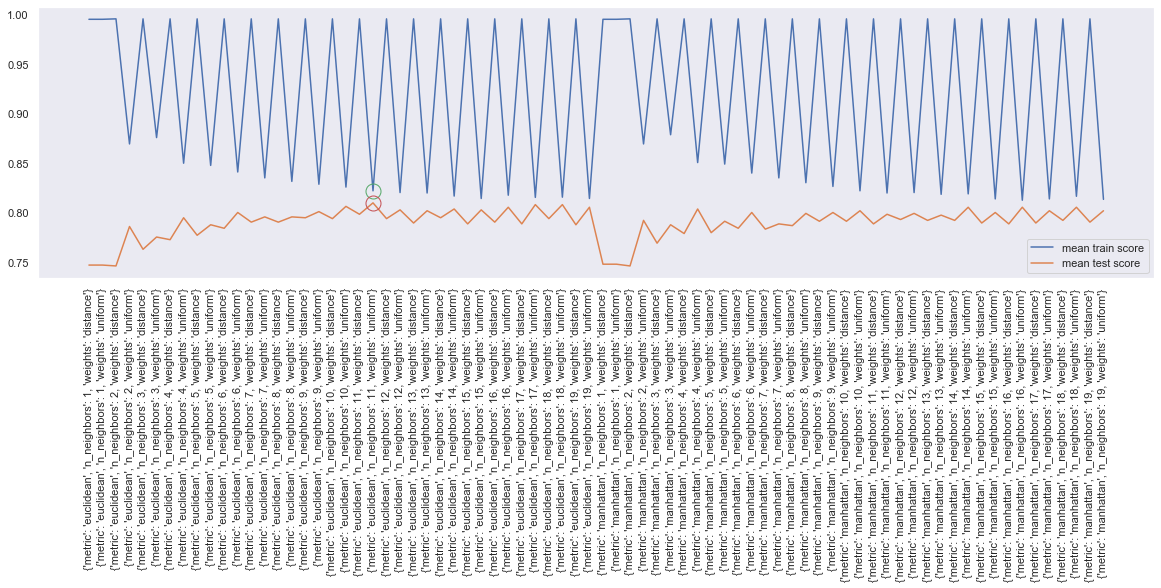

In [33]:
plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([CV_knn_class.best_index_], result['mean_train_score'][CV_knn_class.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([CV_knn_class.best_index_], result['mean_test_score'][CV_knn_class.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

#From the above graph we observe that the best parameters for the KNN Model are 
{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


# [2] Decision Tree Classifier

### Grid Search Using Cross Validation

In [34]:
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint

In [35]:
dtree=DecisionTreeClassifier()
pprint(dtree.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


In [36]:
param_grid_treeclass = {'max_depth' : range(1,15),
                        'min_samples_leaf' : range(2,15)}
            

CV_dtree_class = GridSearchCV(estimator =dtree,cv=5, param_grid = param_grid_treeclass , 
                              scoring='recall', verbose = 1, n_jobs = -1,return_train_score=True)
gs_results_dtree =CV_dtree_class.fit(X_train, y_train)

best_parameters_dtree_class=CV_dtree_class.best_params_
print(best_parameters_dtree_class)

Fitting 5 folds for each of 182 candidates, totalling 910 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s


{'max_depth': 12, 'min_samples_leaf': 7}


[Parallel(n_jobs=-1)]: Done 910 out of 910 | elapsed:    4.1s finished


In [37]:
CV_dtree_class.score(X_test,y_test)

0.6063829787234043

In [38]:
print('best grid search score : {:.4f} '.format(gs_results_dtree.best_score_))

best grid search score : 0.5625 


In [39]:
print('best paramteres for grid search')
gs_results_dtree.best_params_

best paramteres for grid search


{'max_depth': 12, 'min_samples_leaf': 7}

### Using best parameters from GridSearch for Decision Tree Classifier

In [40]:
dtree=DecisionTreeClassifier(max_depth=12, min_samples_leaf=7,random_state=9)

dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)

print('Train score: {:.4f} %'.format(dtree.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(dtree.score(X_test, y_test)*100))

Train score: 85.4996 %
Test score: 81.4324 %


In [41]:
# convert to DataFrame
param_df = pd.DataFrame(CV_dtree_class.cv_results_)
result= param_df[["params","mean_train_score","mean_test_score"]]
# show the first 5 rows
display(result.head())

,params,mean_train_score,mean_test_score
0,"{'max_depth': 1, 'min_samples_leaf': 2}",0.0,0.0
1,"{'max_depth': 1, 'min_samples_leaf': 3}",0.0,0.0
2,"{'max_depth': 1, 'min_samples_leaf': 4}",0.0,0.0
3,"{'max_depth': 1, 'min_samples_leaf': 5}",0.0,0.0
4,"{'max_depth': 1, 'min_samples_leaf': 6}",0.0,0.0


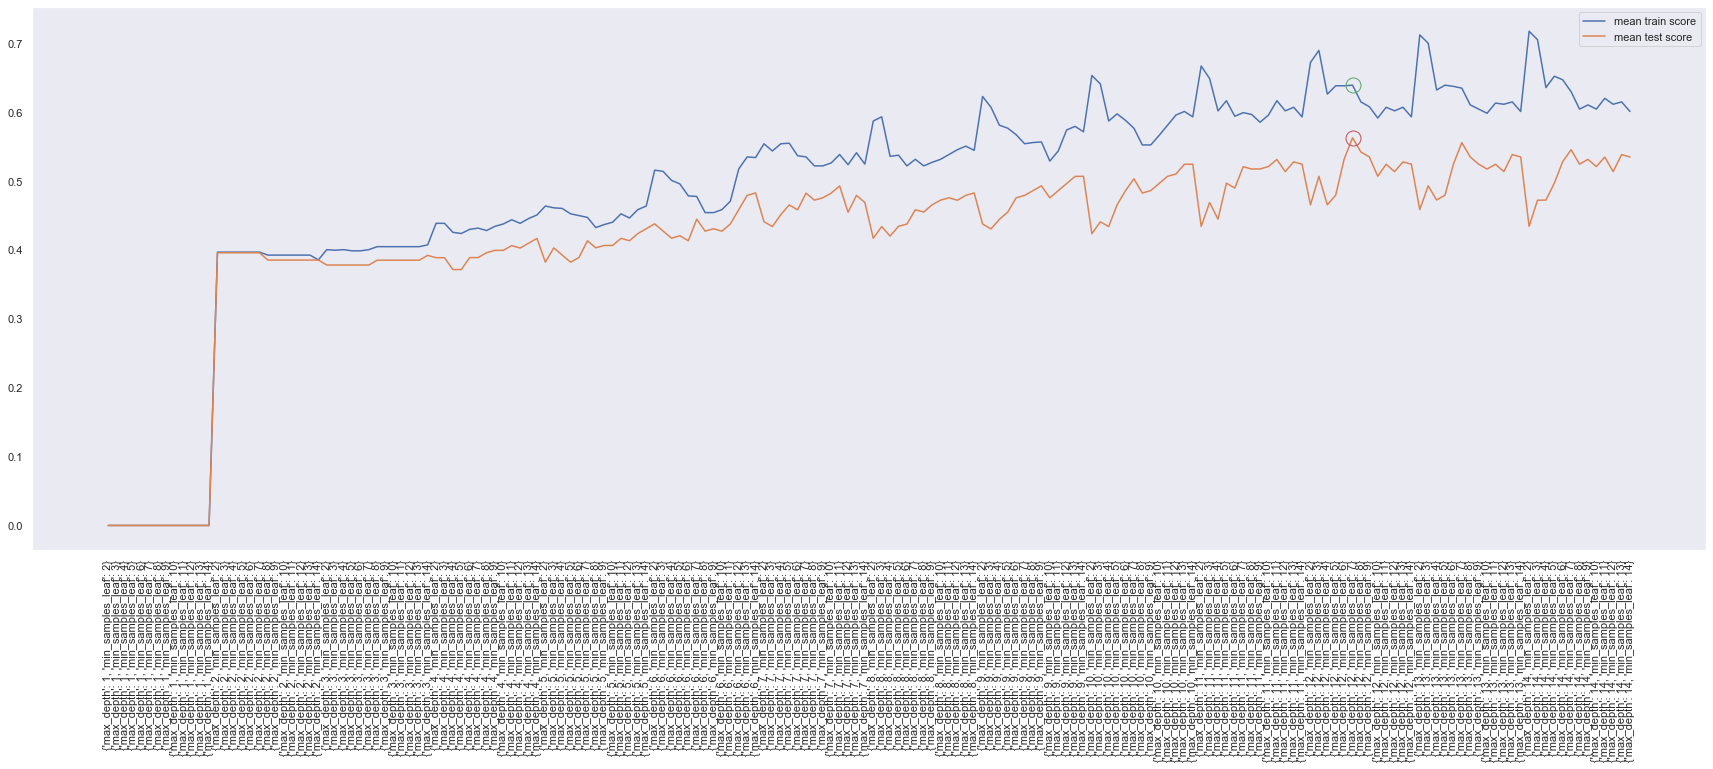

In [42]:
plt.subplots(figsize = (30,10))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([CV_dtree_class.best_index_], result['mean_train_score'][CV_dtree_class.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([CV_dtree_class.best_index_], result['mean_test_score'][CV_dtree_class.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

#From the above graph we observe that the best parameters for the Decision Tree Classifier are 
{'max_depth': 12, 'min_samples_leaf': 7}

# [3] Logistic Regression

### Grid Search with Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression


In [44]:
logreg = LogisticRegression()

In [45]:
from pprint import pprint
pprint(logreg.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [46]:
param_grid_logit = {'penalty' : ['l1','l2'],
                    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

CV_logit_class = GridSearchCV(estimator =logreg, param_grid = param_grid_logit ,cv=5, 
                              scoring='recall', verbose = 1, n_jobs = -1,return_train_score = True)
gs_results_logit =CV_logit_class.fit(X_train, y_train)

best_parameters_logit_class=CV_logit_class.best_params_
print(best_parameters_logit_class)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  55 out of  70 | elapsed:    0.3s remaining:    0.0s


{'C': 100, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished


In [47]:
print("grid search best score: {:.2f}".format(gs_results_logit.best_score_))

grid search best score: 0.51


In [48]:
print("Best paramters for logistic regression")
gs_results_logit.best_params_

Best paramters for logistic regression


{'C': 100, 'penalty': 'l2'}

### Cross validation for Logistic Classifier with folds

In [49]:
scores1 = cross_val_score(logreg, X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores1))
print("Average cross-validation score: {:.2f}".format(scores1.mean()))

Cross-validation scores: [0.79735683 0.78318584 0.82743363 0.83628319 0.79646018]
Average cross-validation score: 0.81


### Using best parameters from GridSearch for Logistic Regression

In [50]:
logistic=LogisticRegression(penalty='l2',C=100,random_state=0)

logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

print('Train score: {:.4f} %'.format(logistic.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(logistic.score(X_test, y_test)*100))

Train score: 82.4050 %
Test score: 82.4934 %


In [51]:
# convert to DataFrame
param_df = pd.DataFrame(CV_logit_class.cv_results_)
result= param_df[["params","mean_train_score","mean_test_score"]]
# show the first 5 rows
display(result.head())

,params,mean_train_score,mean_test_score
0,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN
1,"{'C': 0.001, 'penalty': 'l2'}",0.0,0.0
2,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN
3,"{'C': 0.01, 'penalty': 'l2'}",0.0,0.0
4,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN


###The best parameters for the Logistic Regression are 
{'C': 100, 'penalty': 'l2'}

# [4] Linear Support Vector Machine Classifier

In [52]:
from sklearn.svm import LinearSVC,SVC

### Grid Search with Linear Support Vector Machine Classifier

In [53]:
clf = LinearSVC()
from pprint import pprint
pprint(clf.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}


In [54]:
param_grid_linearSVM = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
CV_linearSVM_class = GridSearchCV(estimator =clf, param_grid = param_grid_linearSVM ,cv=5, scoring='recall', 
                                  verbose = 1, n_jobs = -1,return_train_score = True)
gs_results_linearSVM =CV_linearSVM_class.fit(X_train, y_train)

best_parameters_linearSVM_class = CV_linearSVM_class.best_params_
print(best_parameters_linearSVM_class)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.1s


{'C': 100}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.4s finished


In [55]:
print("grid search best score: {:.2f}".format(gs_results_linearSVM.best_score_))

grid search best score: 0.57


In [56]:
print("Best paramters for LinearSVC regression")
gs_results_linearSVM.best_params_

Best paramters for LinearSVC regression


{'C': 100}

### Cross validation scores for Linear Support Vector Machine Classifier with folds

In [57]:
scores_1 = cross_val_score(clf, X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores1))
print("Average cross-validation score: {:.2f}".format(scores1.mean()))

Cross-validation scores: [0.79735683 0.78318584 0.82743363 0.83628319 0.79646018]
Average cross-validation score: 0.81


### Using best parameters from GridSearch for Linear SVM Classification

In [58]:
clf = LinearSVC(C=100,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
 
print('Train score: {:.4f} %'.format(clf.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(clf.score(X_test, y_test)*100))

Train score: 81.0787 %
Test score: 82.7586 %


In [59]:
# convert to DataFrame
param_df = pd.DataFrame(gs_results_linearSVM.cv_results_)
result= param_df[["params","mean_train_score","mean_test_score"]]
# show the first 5 rows
display(result.head())

,params,mean_train_score,mean_test_score
0,{'C': 0.001},0.005210,0.003509
1,{'C': 0.01},0.389738,0.374773
2,{'C': 0.1},0.495611,0.444404
3,{'C': 1},0.529471,0.475499
4,{'C': 10},0.535551,0.482396


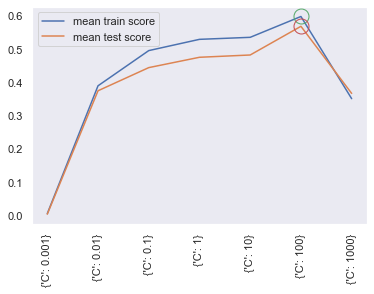

In [60]:
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([gs_results_linearSVM.best_index_], result['mean_train_score'][gs_results_linearSVM.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([gs_results_linearSVM.best_index_], result['mean_test_score'][gs_results_linearSVM.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

###From the above graph we observe that the best parameters for the Linear SVM Classification are {'C': 100}

# [5] RBF Support Vector Machine Classifier

### Grid Search with Support Vector Machine(Kernel=RBF) Classifier

In [61]:
rbf_clf = SVC()
from pprint import pprint
pprint(clf.get_params())

{'C': 100,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}


In [62]:
param_grid_RBFSVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                     'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
CV_RBFSVM_class= GridSearchCV(estimator =rbf_clf, param_grid = param_grid_RBFSVM ,cv=5, scoring='recall', 
                                  verbose = 1, n_jobs = -1,return_train_score = True)
gs_results_RBFSVM =CV_RBFSVM_class.fit(X_train, y_train)

best_parameters_RBFSVM_class = CV_RBFSVM_class.best_params_
print(best_parameters_RBFSVM_class)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.8s


{'C': 100, 'gamma': 0.1}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    7.7s finished


In [63]:
print("grid search best score: {:.2f}".format(gs_results_RBFSVM.best_score_))

grid search best score: 0.52


In [64]:
print("Best paramters for RBFSVC regression")
gs_results_RBFSVM.best_params_

Best paramters for RBFSVC regression


{'C': 100, 'gamma': 0.1}

### Using best parameters from GridSearch for RBF SVM Classification

In [65]:
rbf_clf = SVC(C=100,gamma = 0.1,random_state=0)
rbf_clf.fit(X_train, y_train)
y_pred = rbf_clf.predict(X_test)
 
print('Train score: {:.4f} %'.format(rbf_clf.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(rbf_clf.score(X_test, y_test)*100))

Train score: 88.1521 %
Test score: 81.6976 %


In [66]:
# convert to DataFrame
param_df = pd.DataFrame(gs_results_RBFSVM.cv_results_)
result= param_df[["params","mean_train_score","mean_test_score"]]
# show the first 5 rows
display(result.head())

,params,mean_train_score,mean_test_score
0,"{'C': 0.001, 'gamma': 0.001}",0.0,0.0
1,"{'C': 0.001, 'gamma': 0.01}",0.0,0.0
2,"{'C': 0.001, 'gamma': 0.1}",0.0,0.0
3,"{'C': 0.001, 'gamma': 1}",0.0,0.0
4,"{'C': 0.001, 'gamma': 10}",0.0,0.0


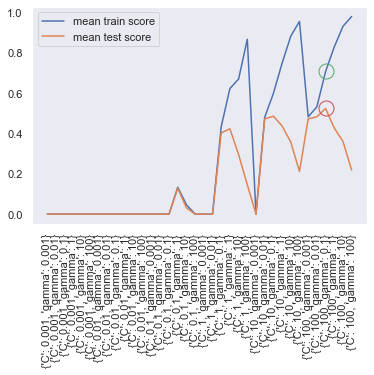

In [67]:
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([gs_results_RBFSVM.best_index_], result['mean_train_score'][gs_results_RBFSVM.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([gs_results_RBFSVM.best_index_], result['mean_test_score'][gs_results_RBFSVM.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

###From the above graph we observe that the best parameters for the RBF SVM Classification are
{'C': 100, 'gamma': 0.1}

# [6] Linear Kernel Support Vector Machine Classifier

### Grid Search with Support Vector Machine(Kernel= Linear) Classifier

In [68]:
linear_clf = SVC(kernel='linear')
from pprint import pprint
pprint(clf.get_params())

{'C': 100,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}


In [69]:
param_grid_LinearSVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
CV_LinearSVM_class= GridSearchCV(estimator =linear_clf, param_grid = param_grid_LinearSVM ,cv=5, scoring='recall', 
                                  verbose = 1, n_jobs = -1,return_train_score = True)
gs_results_LinearSVM =CV_LinearSVM_class.fit(X_train, y_train)

best_parameters_LinearSVM_class = CV_LinearSVM_class.best_params_
print(best_parameters_LinearSVM_class)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'C': 1}


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


In [70]:
print("grid search best score: {:.2f}".format(gs_results_LinearSVM.best_score_))

grid search best score: 0.49


In [71]:
print("Best paramters for LinearSVC regression")
gs_results_LinearSVM.best_params_

Best paramters for LinearSVC regression


{'C': 1}

### Using best parameters from GridSearch for Linear SVM Classification

In [72]:
linear_clf = SVC(C=1,random_state=0)
linear_clf.fit(X_train, y_train)
y_pred = rbf_clf.predict(X_test)
 
print('Train score: {:.4f} %'.format(linear_clf.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(linear_clf.score(X_test, y_test)*100))

Train score: 82.4050 %
Test score: 82.4934 %


In [73]:
# convert to DataFrame
param_df = pd.DataFrame(gs_results_LinearSVM.cv_results_)
result= param_df[["params","mean_train_score","mean_test_score"]]
# show the first 5 rows
display(result.head())

,params,mean_train_score,mean_test_score
0,{'C': 0.001},0.000000,0.000000
1,{'C': 0.01},0.000000,0.000000
2,{'C': 0.1},0.443493,0.444586
3,{'C': 1},0.545940,0.493103
4,{'C': 10},0.539913,0.489413


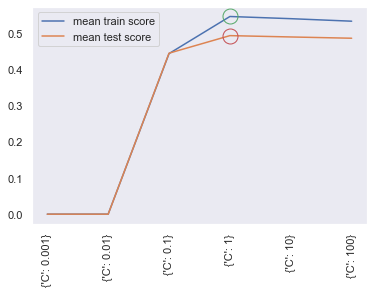

In [74]:
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([gs_results_LinearSVM.best_index_], result['mean_train_score'][gs_results_LinearSVM.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([gs_results_LinearSVM.best_index_], result['mean_test_score'][gs_results_LinearSVM.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

###From the above graph we observe that the best parameters for the SVM Classification with Kernel Linear are {'C': 100}

# [7] Poly Kernel Support Vector Machine Classifier

### Grid Search with Support Vector Machine(Kernel= Poly) Classifier

In [75]:
poly_clf = SVC(kernel='poly')
from pprint import pprint
pprint(clf.get_params())

{'C': 100,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}


In [76]:
param_grid_PolySVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                     'degree': [1,3,5]}
CV_PolySVM_class= GridSearchCV(estimator =poly_clf, param_grid = param_grid_PolySVM ,cv=5, scoring='recall', 
                                  verbose = 1, n_jobs = -1,return_train_score = True)
gs_results_PolySVM =CV_PolySVM_class.fit(X_train, y_train)

best_parameters_PolySVM_class = CV_PolySVM_class.best_params_
print(best_parameters_PolySVM_class)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  75 out of  90 | elapsed:    1.8s remaining:    0.3s


{'C': 10, 'degree': 3}


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.1s finished


In [77]:
print("grid search best score: {:.2f}".format(gs_results_PolySVM.best_score_))

grid search best score: 0.53


In [78]:
print("Best paramters for PolySVC regression")
gs_results_PolySVM.best_params_

Best paramters for PolySVC regression


{'C': 10, 'degree': 3}

### Using best parameters from GridSearch for Poly SVM Classification

In [79]:
poly_clf = SVC(C=10,degree= 3,random_state=0)
poly_clf.fit(X_train, y_train)
y_pred = poly_clf.predict(X_test)
 
print('Train score: {:.4f} %'.format(poly_clf.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(poly_clf.score(X_test, y_test)*100))

Train score: 86.9142 %
Test score: 82.4934 %


In [80]:
# convert to DataFrame
param_df = pd.DataFrame(gs_results_PolySVM.cv_results_)
result= param_df[["params","mean_train_score","mean_test_score"]]
# show the first 5 rows
display(result.head())

,params,mean_train_score,mean_test_score
0,"{'C': 0.001, 'degree': 1}",0.0,0.0
1,"{'C': 0.001, 'degree': 3}",0.0,0.0
2,"{'C': 0.001, 'degree': 5}",0.0,0.0
3,"{'C': 0.01, 'degree': 1}",0.0,0.0
4,"{'C': 0.01, 'degree': 3}",0.0,0.0


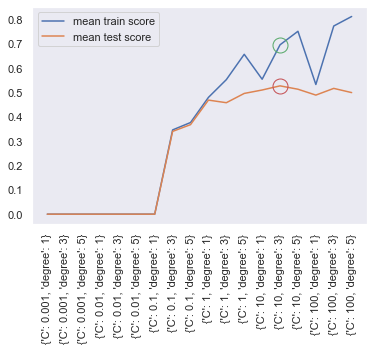

In [81]:
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([gs_results_PolySVM.best_index_], result['mean_train_score'][gs_results_PolySVM.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([gs_results_PolySVM.best_index_], result['mean_test_score'][gs_results_PolySVM.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

###From the above graph we observe that the best parameters for the SVM Classification with Kernel Poly are 
{'C': 100, 'degree':3}

# Best Classification Model

In [82]:
model=["KNN","Decision Tree Classifier","Logistic Regression","Linear SVM","SVM RBF Kernel",
       "SVM Linear Kernel","SVM Poly Kernel"]
X_train_score_accuracy=[CV_knn_class.score(X_train,y_train),CV_dtree_class.score(X_train,y_train),logistic.score(X_train,y_train),
                        clf.score(X_train,y_train),rbf_clf.score(X_train,y_train),linear_clf.score(X_train,y_train),
                        poly_clf.score(X_train,y_train)]
X_test_score_accuracy=[CV_knn_class.score(X_test,y_test),CV_dtree_class.score(X_test,y_test),logistic.score(X_test,y_test),
                       clf.score(X_test,y_test),rbf_clf.score(X_test,y_test),linear_clf.score(X_test,y_test),
                       poly_clf.score(X_test,y_test)]

gh = {"model":model,"Train Accuracy":X_train_score_accuracy,"Test accuracy":X_test_score_accuracy}

In [83]:
accuracy_score = pd.DataFrame(gh)

In [84]:
accuracy_score

,model,Train Accuracy,Test accuracy
0,KNN,0.825818,0.832891
1,Decision Tree Classifier,0.600694,0.606383
2,Logistic Regression,0.824050,0.824934
3,Linear SVM,0.810787,0.827586
4,SVM RBF Kernel,0.881521,0.816976
5,SVM Linear Kernel,0.824050,0.824934
6,SVM Poly Kernel,0.869142,0.824934


([<matplotlib.axis.XTick at 0x13d3a4d0>,
 <a list of 7 Text xticklabel objects>)

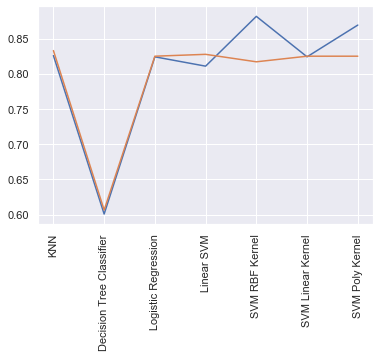

In [85]:
import matplotlib.pyplot as plt
plt.plot(range(accuracy_score['Train Accuracy'].shape[0]), accuracy_score['Train Accuracy'], label = 'mean train score')
plt.plot(range(accuracy_score['Test accuracy'].shape[0]), accuracy_score['Test accuracy'], label = 'mean test score')
plt.xticks(range(accuracy_score['model'].shape[0]), accuracy_score['model'], rotation = 90)

# Based on the above accuracy score, the best classification model for our data set is SVM Linear Kernel as the Train Accuracy has the highest accuracy score classifying almost 90% of the data and the Test Accuracy indicating that around 80% of the test data is classified accurately